In [15]:
!pip install tensorflow

In [12]:
!pip install scikit-learn

   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 8.7/8.7 MB 51.6 MB/s  0:00:00
   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
   ----------------- ---------------------- 16.5/38.5 MB 82.2 MB/s eta 0:00:01
   ------------------------------- -------- 29.9/38.5 MB 92.4 MB/s eta 0:00:01
   ------------------------------- -------- 29.9/38.5 MB 92.4 MB/s eta 0:00:01
   ------------------------------- -------- 29.9/38.5 MB 92.4 MB/s eta 0:00:01
   ------------------------------- -------- 30.7/38.5 MB 31.7 MB/s eta 0:00:01
   ------------------------------- -------- 30.7/38.5 MB 31.7 MB/s eta 0:00:01
   ---------------------------------------- 38.5/38.5 MB 27.4 MB/s  0:00:01

   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------

In [2]:
import pandas as pd
import numpy as np 
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns
sns.set(style = "darkgrid")

In [5]:
cols = ['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety', 'output']
cars = pd.read_csv('car_evaluation.csv',names = cols, header = None) 


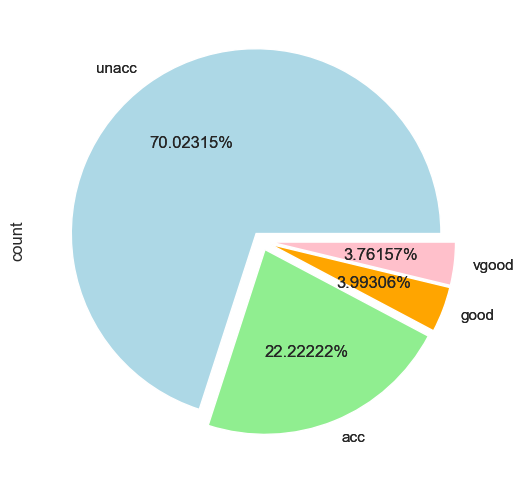

In [9]:
plot_size = plt.rcParams["figure.figsize"]
plot_size [0] = 8
plot_size [1] = 6
plt.rcParams["figure.figsize"] = plot_size
cars.output.value_counts().plot(kind='pie', autopct = '%0.05f%%', colors=['lightblue','lightgreen','orange','pink'],explode = (0.05, 0.05, 0.05, 0.05))

plt.show()

In [10]:
price = pd.get_dummies(cars.price, prefix = 'price')
maint = pd.get_dummies(cars.maint, prefix = 'maint')

doors = pd.get_dummies(cars.doors, prefix = 'doors')
persons = pd.get_dummies(cars.persons, prefix = 'persons')

lug_capacity = pd.get_dummies(cars.lug_capacity, prefix = 'lug_capacity')
safety = pd.get_dummies(cars.safety, prefix = 'safety')

labels = pd.get_dummies(cars.output, prefix = 'condition')

X = pd.concat([price, maint, doors, persons, lug_capacity, safety], axis = 1)
y = labels.values

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state =42)

In [19]:
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.models import Model

input_layer = Input(shape=(X.shape[1],))

dense_layer_1 = Dense(15, activation = 'relu')(input_layer)
dense_layer_2 = Dense(10, activation = 'relu')(dense_layer_1)
output = Dense(y.shape[1], activation = 'softmax')(dense_layer_2)

model = Model(inputs = input_layer, outputs = output)

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 21)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 15)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 4)              │            44 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 534 (2.09 KB)

 Trainable params: 534 (2.09 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
history = model.fit(X_train, y_train, batch_size = 8, epochs = 50, verbose =1, validation_split=0.2)


Epoch 1/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.6136 - loss: 1.0678 - val_acc: 0.6498 - val_loss: 0.8790
Epoch 2/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc: 0.7195 - loss: 0.6503 - val_acc: 0.6498 - val_loss: 0.6500
Epoch 3/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc: 0.7701 - loss: 0.4799 - val_acc: 0.8159 - val_loss: 0.5305
Epoch 4/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc: 0.8697 - loss: 0.3858 - val_acc: 0.8448 - val_loss: 0.4655
Epoch 5/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc: 0.8923 - loss: 0.3310 - val_acc: 0.8448 - val_loss: 0.4217
Epoch 6/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.8905 - loss: 0.2977 - val_acc: 0.8556 - val_loss: 0.3853
Epoch 7/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.8932 - loss: 0.2694 - val_acc: 0.8520 - val_loss: 0.3578
Epoch 8/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.8986 - loss: 0.2458 - val_acc: 0.8664 - val_loss: 0.3299
Epoch 9/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - ac

In [21]:
score = model.evaluate(X_test, y_test, verbose =1)
print("Test Score:", score[0]) # score[0] 손실함수
print("Test Accuracy:", score[1]) # score[1] metrics

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9769 - loss: 0.0685 
Test Score: 0.06852062046527863
Test Accuracy: 0.9768785834312439
